In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv('/content/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [48]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [50]:
df.shape

(5572, 2)

In [51]:
df.dtypes

Category    object
Message     object
dtype: object

In [52]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [54]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [55]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

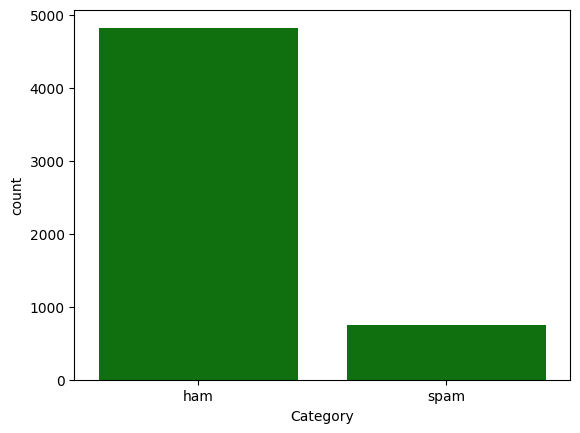

In [56]:
sns.countplot(x='Category',data=df,color='green')

In [57]:
#labeling spam mail as 0 and ham mail as 1
df['Category']=df['Category'].replace('spam',0)
df['Category']=df['Category'].replace('ham',1)
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [58]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [59]:
mail=df.Message
mail

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [63]:
#Tokenization'
from nltk import TweetTokenizer
tk=TweetTokenizer()
mail=mail.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
mail

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ü b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [69]:
mail=mail.str.replace('[^a-zA-Z0-9]+',' ')


In [70]:
# remove Words with  a length less than 3 characeters
from nltk.tokenize import word_tokenize
mail=mail.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
mail

0       until jurong point crazy Available only bugis ...
1                              lar ... Joking wif oni ...
2       Free entry wkly comp win Cup final tkts 21st M...
3              dun say early hor ... already then say ...
4         Nah n't think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569     Pity was mood for that ... any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: Message, Length: 5572, dtype: object

In [73]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
mail=mail.apply(lambda x:[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
mail

0       until jurong point crazi avail on bugi great w...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3                dun say ear hor ... alreadi then say ...
4           nah n't think goe usf live around here though
                              ...                        
5567    this the 2nd time have tri contact have won th...
5568                                will go esplanad home
5569         piti was mood for that ... ani other suggest
5570    the guy did some bitch but act like interest b...
5571                                 rofl it true it name
Name: Message, Length: 5572, dtype: object

In [74]:
#removal of stopword
from nltk.corpus import stopwords
sw=stopwords.words('english')
mail=mail.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
mail

0       jurong point crazi avail bugi great world buff...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3                     dun say ear hor ... alreadi say ...
4                nah n't think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                     go esplanad home
5569                            piti mood ... ani suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [76]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(mail)
train_data

<5572x7048 sparse matrix of type '<class 'numpy.float64'>'
	with 44460 stored elements in Compressed Sparse Row format>

In [78]:
# here x is train data
y=df['Category']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [80]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.3,random_state=42)

In [81]:
x_train

<3900x7048 sparse matrix of type '<class 'numpy.float64'>'
	with 31302 stored elements in Compressed Sparse Row format>

In [82]:
x_test

<1672x7048 sparse matrix of type '<class 'numpy.float64'>'
	with 13158 stored elements in Compressed Sparse Row format>

In [83]:
y_train

708     1
4338    1
5029    1
4921    1
2592    1
       ..
3772    1
5191    1
5226    1
5390    1
860     1
Name: Category, Length: 3900, dtype: int64

In [84]:
y_test

3245    1
944     1
1044    1
2484    1
812     1
       ..
2505    1
2525    0
4975    1
650     0
4463    1
Name: Category, Length: 1672, dtype: int64

In [85]:
#training the model using KNN,Naivebaiyes and logistic regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
knn_model=KNeighborsClassifier(n_neighbors=7)
naive_model=MultinomialNB()
svm_model=SVC()
logi_model=LogisticRegression()

In [86]:
models=[knn_model,naive_model,svm_model,logi_model]

In [89]:
for i in models:
  print("model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("/"*250)
  print(confusion_matrix(y_test,y_pred))
  print("accuracy score is ",accuracy_score(y_test,y_pred))
  print("/"*250)

model name is KNeighborsClassifier(n_neighbors=7)
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
[[  43  181]
 [   0 1448]]
accuracy score is  0.8917464114832536
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
model name is MultinomialNB()
//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
[[ 170   54]
 [   1 1447]]
accuracy score is  0.9671052631578947
/////////////////////////////////////

In [91]:
# Building a predictive system
new_mail=["Cool, what time you think you can get here?"]
new_data = vec.transform(new_mail)

all_predictions = []
for model in models:
    predictions = model.predict(new_data)
    all_predictions.append(predictions)

# Print the predictions for each model
for i, predictions in enumerate(all_predictions):
    print("Predictions for model", i+1, ":", predictions)

if predictions == 1:
    print("mail is ham")
else:
    print("mail is spam")

Predictions for model 1 : [1]
Predictions for model 2 : [1]
Predictions for model 3 : [1]
Predictions for model 4 : [1]
mail is ham
